<a href="https://colab.research.google.com/github/hmmonir/Digital-cafe/blob/master/written_text(hand)_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#handwritten digit classification
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [7]:
#Dataset Load
(xtrain, ytrain), (xtest, ytest)= keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [13]:
xtrain.shape


(60000, 28, 28)

In [12]:
xtest.shape

(10000, 28, 28)

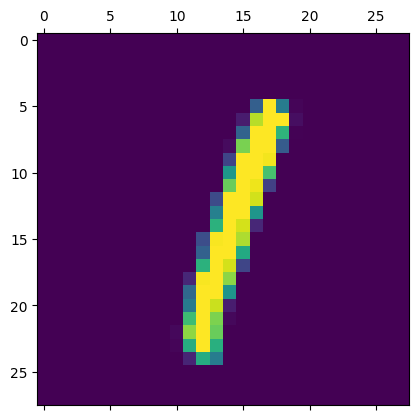

In [20]:
plt.matshow(xtest[5])

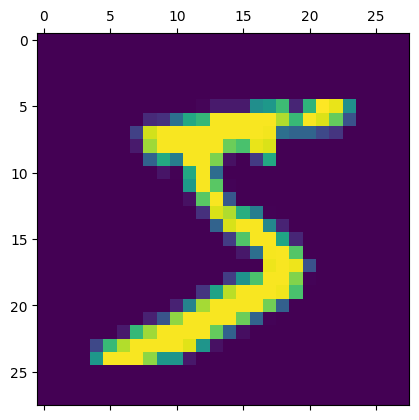

In [26]:
plt.matshow(xtrain[0])

In [28]:
#Feature Sclaing
#Normalize

xtrain = (xtrain / 255)
xtrain[1]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [30]:
xtest = xtest / 255
xtest[1]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [32]:
#flatten the images into 28*28 = 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)
xtrain[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [33]:
xtrain.shape

(60000, 784)

In [35]:
model = keras.Sequential()
model.add( Dense(50, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='sigmoid'))

model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [42]:
model.fit(xtrain,
          to_categorical(ytrain),
          epochs=60,
          batch_size=32,
          )

Epoch 1/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9978
Epoch 4/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0077 - accuracy: 0.9982
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9980
Epoch 7/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0071 - accuracy: 0.9983
Epoch 8/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9982
Epoch 10/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.006

In [43]:
#Evaluate
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.9679


[0.24436724185943604, 0.9678999781608582]

In [45]:
pred = model.predict(xtest)
pred

313/313 [==============================] - 1s 2ms/step


array([[8.00800848e-08, 1.08308565e-13, 6.45278124e-05, ...,
        1.00000000e+00, 2.64358305e-12, 1.04221527e-03],
       [4.93527841e-22, 9.98875380e-01, 1.00000000e+00, ...,
        7.36490560e-24, 4.05441208e-10, 0.00000000e+00],
       [3.62890785e-17, 9.99987662e-01, 3.83864572e-05, ...,
        1.24460133e-02, 4.80340299e-04, 2.31184583e-09],
       ...,
       [3.38529047e-24, 9.54267091e-19, 2.18962721e-19, ...,
        1.10092398e-04, 2.15466844e-06, 7.18854249e-01],
       [2.50951755e-21, 3.75015774e-12, 3.01123827e-24, ...,
        3.54730649e-17, 9.42169011e-01, 8.64832478e-19],
       [1.59602873e-10, 4.62160914e-22, 8.60974399e-12, ...,
        1.80936150e-33, 1.21830003e-11, 3.81978630e-23]], dtype=float32)

In [52]:
np.argmax(pred[5])

1